In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

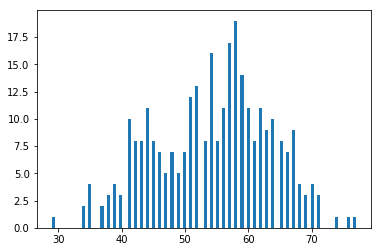

In [3]:
plt.hist(df['age'], bins = 100);

Here we can see a nice age distribution. The age of this data set is approaching a gaussian distribution

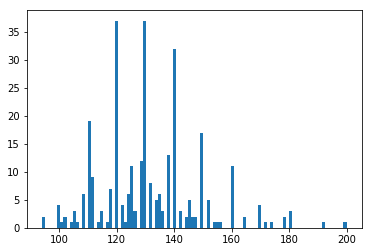

In [4]:
plt.hist(df['trestbps'],bins=100);

This is the resting bloodpressure upon admission

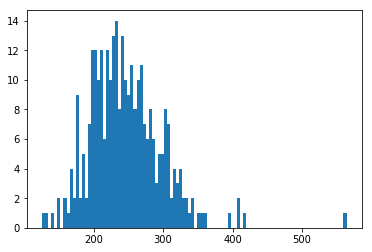

In [5]:
plt.hist(df['chol'], bins=100);

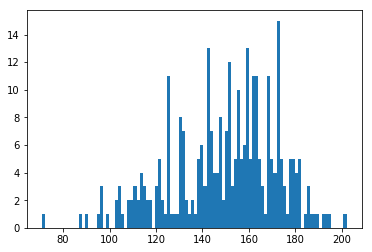

In [6]:
plt.hist(df['thalach'],bins = 100);

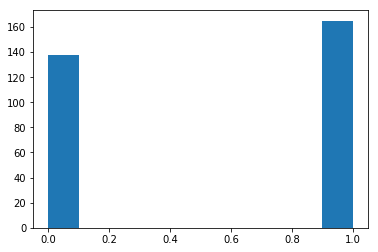

In [7]:
plt.hist(df['target']);

# Creating the dataframe

In [8]:
df_heart = pd.DataFrame(df, columns=['age', 'trestbps', 'chol','thalach', 'sex', 'ca', 'target'])

In [9]:
df_heart.head()

,age,trestbps,chol,thalach,sex,ca,target
0,63,145,233,150,1,0,1
1,37,130,250,187,1,0,1
2,41,130,204,172,0,0,1
3,56,120,236,178,1,0,1
4,57,120,354,163,0,0,1


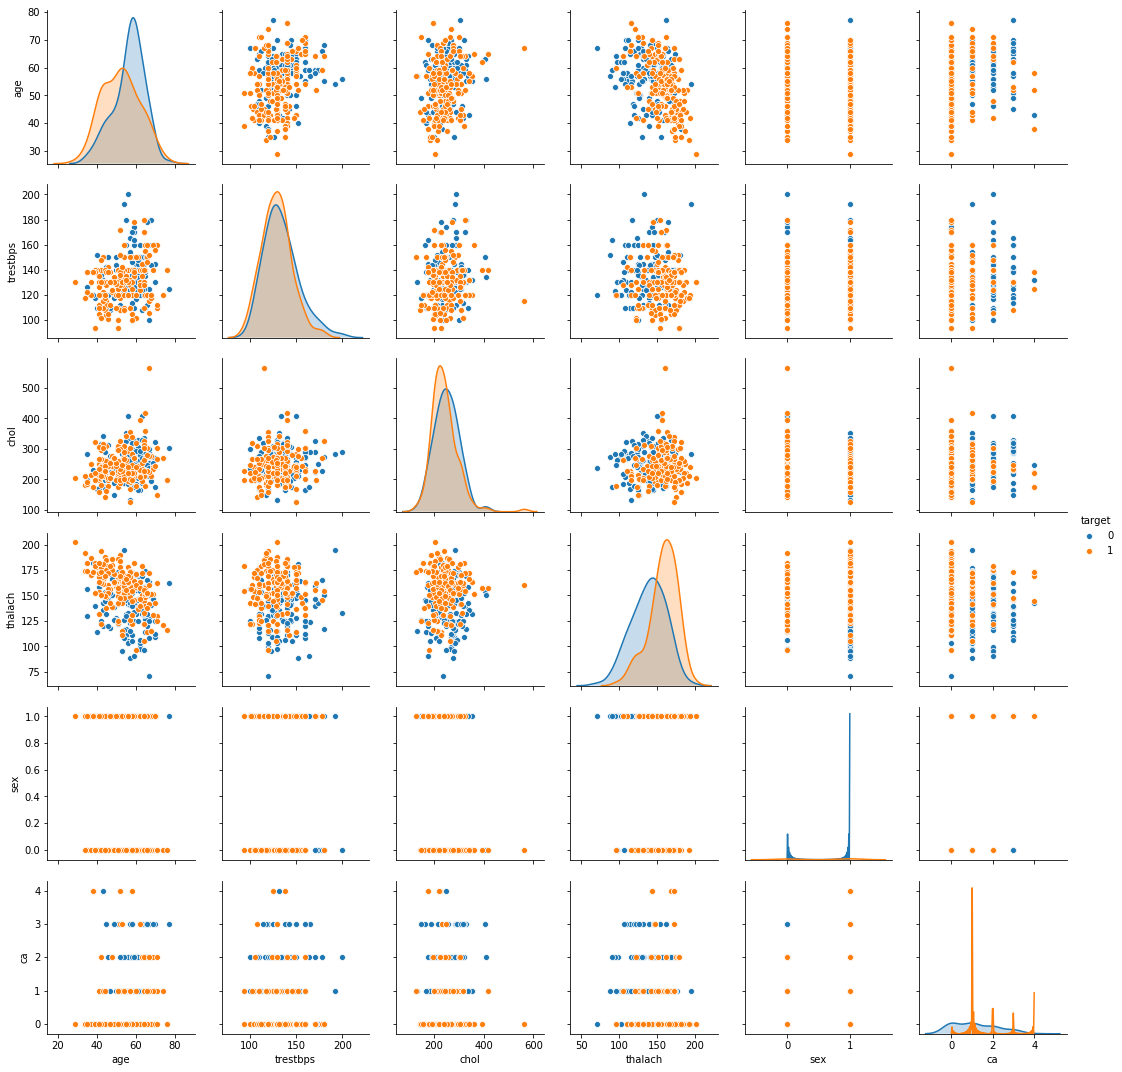

In [10]:
sns.pairplot(df_heart, hue='target', vars=['age','trestbps','chol','thalach','sex', 'ca' ])

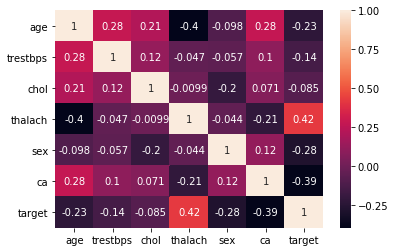

In [11]:
sns.heatmap(df_heart.corr(),annot= True);

# Creating the feature set

In [12]:
X = df_heart.drop(['target'], axis =1)
X.head()

,age,trestbps,chol,thalach,sex,ca
0,63,145,233,150,1,0
1,37,130,250,187,1,0
2,41,130,204,172,0,0
3,56,120,236,178,1,0
4,57,120,354,163,0,0


In [13]:
y = df_heart['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# Creating the training and test sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 6)
(61, 6)
(242,)
(61,)


# Creating the model

In [16]:
from sklearn.svm import SVC

In [17]:
svc_model = SVC(kernel='rbf')

In [18]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_predict = svc_model.predict(X_test)

Creating a confusion matrix to display binary classifier to show the model performance

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
sns.heatmap(confusion, annot=True)

NameError: name 'confusion' is not defined

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.58      0.48      0.52        23
           1       0.71      0.79      0.75        38

    accuracy                           0.67        61
   macro avg       0.65      0.63      0.64        61
weighted avg       0.66      0.67      0.66        61

